In [1]:
import sys
import pickle 

sys.path.append(sys.path[0] + "/..")  # Adds higher directory to python modules path.

import numpy as np
from Functions import renormalize, scomplex, plotting
import matplotlib.pyplot as plt
import networkx as nx
import powerlaw as pwl
import seaborn as sns
import scipy
from matplotlib.colors import LinearSegmentedColormap
import xgi

plt.rcParams["text.usetex"] = True

import matplotlib.colors as mcolors

from matplotlib.colors import LinearSegmentedColormap

#colors = ["#071C56","#06418F","#2B589F","#5A5389","#7F588D","#533262","#B45389","#D75F78","#FDA599","#A40237"]
colors = ["#003F5C","#2F4B7C","#665191","#A05195","#D45087","#F95D6A","#FF7C43","#FFA600"]
colors_sequential = colors + colors + colors + colors 
colors = ["#02405c", "#fea600", "#a20655", "#5e96c5", "#4b3596", "#fa6ca9", "#8d6cf6"]
colors_curves = colors+ colors+ colors+ colors
#cmap = LinearSegmentedColormap.from_list("my_sas",colors)


## Generate Simplicial Complex

### Tree increase branching

In [69]:
edges = [(0,1)]
new_boundary = [0,1]
n = 2
steps = 6
sas = 3
for s in range(steps):
    boundary = new_boundary
    new_boundary = []
    #if np.mod(s,4) == 0:
    #    sas += 1
    for node in boundary:
        for l in range(sas):
            new_boundary.append(n)
            edges.append((node,n))
            n += 1
       
G = nx.from_edgelist(edges)
sc = scomplex.convert_graph_to_sc(G,dim = 2)

sc["n0"]


2186

### Tree 2 0

In [6]:
# Tree (2,0)
edges = [(0,1),(1,2),(0,2)]
new_boundary = [0,1,2]
n = 3
steps = 2
for s in range(steps):
    boundary = new_boundary
    new_boundary = []
    for node in boundary:
        new_boundary.append(n)
        new_boundary.append(n+1)
        edges.append((node,n))
        edges.append((node,n+1))
        edges.append((n,n+1))
        n += 2
G = nx.from_edgelist(edges)
sc = scomplex.convert_graph_to_sc(G,dim = 2)
sc["n0"]

21

### Tree 2 1

In [78]:
# Tree (2,1)
edges = [(0,1),(1,2),(0,2)]
new_boundary = edges.copy()
n = 3
steps =3
for s in range(steps):
    boundary = new_boundary
    new_boundary = []
    for ed in boundary:
        edges.append((ed[0],n))
        edges.append((ed[1],n))
        new_boundary.append((ed[0],n))
        new_boundary.append((ed[1],n))
        n += 1

G = nx.from_edgelist(edges)
sc = scomplex.convert_graph_to_sc(G, dim = 2)
sc["n0"]

24

### Pseudofractal 1 0

In [55]:
def PF10(steps):
    edges = [(0,1)]
    nodes = [0,1]
    n = 2
    for s in range(steps):
        boundary = nodes.copy()
        for node in boundary:
            nodes.append(n)
            edges.append((node,n))
            n += 1

    G = nx.from_edgelist(edges)
    sc = scomplex.convert_graph_to_sc(G,dim = 1)
    return sc

In [61]:
sc = PF10(9)

### Pseudofractal 2 1

In [2]:
# Pseudofractal (2,1)
def PF21(steps):
    edges = [(0,1),(1,2),(0,2)]
    n = 3
    for s in range(steps):
        boundary = edges.copy()
        for ed in boundary:
            edges.append((ed[0],n))
            edges.append((ed[1],n))
            n += 1

    G = nx.from_edgelist(edges)
    sc = scomplex.convert_graph_to_sc(G,dim = 2)
    return sc

In [3]:
sc = PF21(4)
sc["n0"]

123

### Pseudofractal 3 2

In [31]:
def PF32(steps):
    edges = [(0,1),(0,2),(0,3),(1,2),(1,3),(2,3)]
    faces = [(0,1,2),(0,1,3),(0,2,3),(1,2,3)]
    n = 4
    for s in range(steps):
        boundary = faces.copy()
        for fa in boundary:
            edges.append((fa[0],n))
            edges.append((fa[1],n))
            edges.append((fa[2],n))
            faces.append((fa[0],fa[1],n))
            faces.append((fa[0],fa[2],n))
            faces.append((fa[1],fa[2],n))
            n += 1

    G = nx.from_edgelist(edges)
    sc = scomplex.convert_graph_to_sc(G,dim = 3)

    return sc


### Pseudofractal 2 0

In [198]:
# Pseudofractal (2,0)
nodes = [0,1,2]
edges = [(0,1),(1,2),(0,2)]
n = 3
steps = 6
for s in range(steps):
    boundary = nodes.copy()
    for node in boundary:
        edges.append((node,n))
        edges.append((node,n+1))
        edges.append((n,n+1))
        nodes.append(n)
        nodes.append(n+1)
        n += 2

G = nx.from_edgelist(edges)
sc = scomplex.convert_graph_to_sc(G,dim = 2)

### Real network

In [105]:
#["asoiaf", "ego-facebook","subelj_euroroad_euroroad", "dimacs10-netscience", "arenas-email", "dimacs10-celegans_metabolic", "moreno_propro_propro"]
f = open("../Datasets/AThaliana_BinaryHQ.txt","r")

i = 0
edges = []
for line in f:
    if i != 0:
        words = line.split()
        edges.append((words[0],words[1]))
    else:
        i += 1
f.close()
G = nx.from_edgelist(edges)
G = nx.convert_node_labels_to_integers(G)
G.remove_edges_from(nx.selfloop_edges(G))
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G = G.subgraph(Gcc[0])
sc = scomplex.convert_graph_to_sc(G,dim = 2)


### Real Networkx XGI

In [82]:

# email-enron,email-eu,"hospital-lyon”,"contact-high-school”,“contact-primary-school”,“tags-ask-ubuntu”,“congress-bills”,“disgenenet”,“diseasome”,
#“ndc-substances”,“coauth-mag-geology”,“coauth-mag-history”,

# email-enron, hospital-lyon, contact-high-school, diseasome, “disgenenet”

name = "email-eu"
maxd = 3
H = xgi.load_xgi_data(name, max_order=maxd)
H.cleanup()
H = xgi.SimplicialComplex(H.edges.members())
H.close()

sc = {}
sc["nodes"] = np.sort(np.array([H.nodes]).T,0)
sc["n0"] = sc["nodes"].shape[0]
keys = ["edges","faces","tetrahedra","4-simplices"]
for k in keys:
    sc[k] = []
for e in H.edges.members():
    sc[keys[len(e)-2]].append(list(e))

for i,k in enumerate(keys):
    if len(sc[k]) == 0:
        sc[k] = np.zeros((0,i+2))
    else:
        sc[k] = np.unique(np.sort(np.array(sc[k]),1),axis =0)
    
    sc[f"n{i+1}"] = sc[k].shape[0]   


### NGF

In [4]:
# Network Geometry with Flavor
d = 3
N = 220
s = 1
m = 1
beta = 0.1
sc = scomplex.NGF(d,N,s,beta,m)

### Lattice

In [70]:
def subdivide(G):
    n = len(G.nodes) 
    G2 = G.copy()
    for e in G2.edges:
        e0 = e[0]
        e1 = e[1]
        G.remove_edge(e0,e1)
        G.add_edge(e0,n)
        G.add_edge(n,e1)
        n += 1
        
    return G

In [74]:
G = nx.grid_graph([20,20],periodic=True)
for s in range(4):
    G = subdivide(G)


sc = scomplex.convert_graph_to_sc(G)
sc["n0"]

12400

### Lattice sparsified

In [90]:
l = 200 #220
s = 20
G = nx.grid_graph([l,l],periodic=True)
G2 = G.copy()
for n in G2.nodes:
    if (np.mod(n[0],s)) != 0 and (np.mod(n[1],s)) != 0 :
        G.remove_node(n)
sc = scomplex.convert_graph_to_sc(G)
#nx.draw(G)
sc["n0"]

3900

In [93]:
L = scomplex.diffusion_laplacian(sc,2,1)
D,U = np.linalg.eigh(L)

<AxesSubplot: >

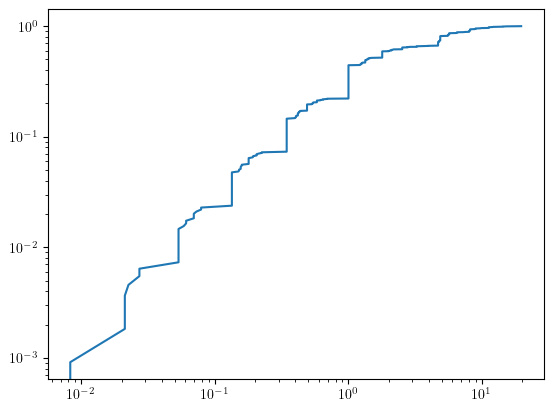

In [94]:
pwl.plot_cdf(D[D>10**-10])
#plt.savefig(f'../Experiments_results/Diffusion_Laplacians/Heat_curves/mega_grid_eigenvalues_cdf.pdf')


### Mega ladder

In [152]:
lw = 60#220
lh = 16
s = 4
G = nx.grid_graph([lh,lw],periodic=True)
G2 = G.copy()
for n in G2.nodes:
    if (np.mod(n[0],s)) != 0 and (np.mod(n[1],s)) != 0 :
        G.remove_node(n)
H = nx.grid_graph([3,3])
G = nx.cartesian_product(G,H)
sc = scomplex.convert_graph_to_sc(G)
#nx.draw(G)
sc["n0"]

3780

In [ ]:
layout = nx.kamada_kawai_layout(G)
nx.draw(G,node_size = 4,pos = layout,node_color = 'black')
#plt.savefig(f'../Experiments_results/Diffusion_Laplacians/Heat_curves/mega_grid_plot.pdf')


### Chain

In [117]:
edges = []
steps = 100
for s in range(steps):
   edges.append((s,s+1))
   #edges.append((s,steps+s))
   #edges.append((steps + s,steps+s + 1))
edges.append((s+1,0))
n = s+1
edges.append((0,n))
for s in range(steps):
   edges.append((n,n+1))
   n+=1
edges.append((n,s+1))

#edges.append((steps + s +1,steps))

G = nx.from_edgelist(edges)
sc = scomplex.convert_graph_to_sc(G,dim = 1)

### Chordal cycle

In [176]:
G = nx.chordal_cycle_graph(6113)
G = nx.Graph(G)
G.remove_edges_from(nx.selfloop_edges(G))
sc = scomplex.convert_graph_to_sc(G, dim = 1)

### Random tree

In [94]:
N = 300
G = nx.random_tree(n = N)
sc = scomplex.convert_graph_to_sc(G,dim = 1)

### Mega-tree

In [86]:
def subdivide(G):
    n = np.max(G.nodes) + 1
    G2 = G.copy()
    for e in G2.edges:
        e0 = e[0]
        e1 = e[1]
        G.remove_edge(e0,e1)
        G.add_edge(e0,n)
        G.add_edge(n,e1)
        n += 1
        
    return G

In [100]:
N = 300
G = nx.random_tree(n = N)
G = subdivide(G)
G = subdivide(G)
sc = scomplex.convert_graph_to_sc(G,dim = 1)
sc["n0"]
#layout = nx.kamada_kawai_layout(G)
#nx.draw(G,node_size = 4,pos = layout,node_color = 'black')

1197

In [ ]:
layout = nx.kamada_kawai_layout(G)
nx.draw(G,node_size = 4,pos = layout,node_color = 'black')
#plt.savefig(f'../Experiments_results/Diffusion_Laplacians/Heat_curves/mega_grid_plot.pdf')


### SBM

In [2]:
sizes = [75, 75, 75]
probs = [[0.4, 0.01, 0.01], [0.01, 0.4, 0.01], [0.01, 0.01, 0.40]]
G = nx.stochastic_block_model(sizes, probs, seed=0)
sc = scomplex.convert_graph_to_sc(G,dim = 1)

## Plot complex

In [ ]:
# Plot simplicial complex (might be slow)
f,axs = plt.subplots(1,1,figsize = (4,4))
for i in range(1):
    sc = scomplex.NGF(4,60,1,1,1)
    #ax = axs[i]
    ax = axs
    plotting.plot_complex(sc,ax = ax,face_color=[colors_sequential[2*3]],layout = "spring", iterations = 200, node_size=20,face_alpha = 0.3)
    ax.collections[0].set_linewidth(1) 
    ax.collections[0].set_edgecolor("#FFFFFF") 
    ax.collections[0].set_alpha(1)
plt.tight_layout()
#plt.savefig('../Experiments_results/Diffusion_Laplacians/Heat_curves/NGF/plot_complexes_4d.pdf')


In [ ]:
# Plot simplicial complex (might be slow)

f,ax = plt.subplots(1,1)
plotting.plot_complex(sc,ax = ax,face_color=[colors[3]],layout = "spring", iterations = 100, node_size=20)


## Statistical physics of information diffusion

Compute entropic susceptibility/specific heat curves for the chosen Laplacians


In [102]:

sparse = False
num_eigs = 500

# Define strings which specify the Laplacians to consider

#laplacians_types = ["32"]
laplacians_types = ["01","02","10","12","20","21"]
#laplacians_types = ["01","10"]
#laplacians_types = ["01","02","12"]
#laplacians_types = ["01","03","13","23"]
#laplacians_types = ["01","02","03","10","12","13","20","21","23","30","31","32"]

# Compute eigenvalues of the Laplacians and their specific heat curves
taumin = -3#-3 # Heat curve starts from 10**taumin
taumax = 4#5 # Heat curve ends at 10**taumax
ntau = 200 # Number of taus to consider in the interval

sp_heats = []
sp_dims = []

for l in laplacians_types:  
    print(f"L_({l[0]},{l[1]})")  
    L = scomplex.diffusion_laplacian(sc, k=int(l[0]), l=int(l[1]),sparse = sparse)

    # # Configuration model
    # A = scomplex.diffusion_laplacian(sc, k=int(l[0]), l=int(l[1]),sparse = sparse)
    # Gcm = nx.Graph(A)
    # Gcm = nx.configuration_model([val for (node, val) in G.degree()])
    # L = nx.laplacian_matrix(Gcm).todense()

    if sparse:
        D,U = scipy.sparse.linalg.eigsh(L.asfptype(),k = num_eigs, which = "SM")
        D = np.append(D,1000000*np.ones(L.shape[0]-num_eigs),axis=0)
    else:
        D,U = np.linalg.eigh(L)
        D = np.abs(D)

    specific_heat,tau_space, __ = renormalize.compute_heat(D,taumin,taumax,ntau)
    #spectral_dimension,tau_space = renormalize.compute_spectral_d(D,taumin,taumax,ntau)
    sp_heats.append(specific_heat)
    #sp_dims.append(spectral_dimension)


L_(0,1)


/Users/marconurisso/Desktop/Lavoro/Simplicial_Renormalization/HodgeLaplacianRenorm/higher_order_LRG/HOLR/Experiments_setups/../Functions/renormalize.py:28: RuntimeWarning: overflow encountered in exp
  mu[i] = 1 / np.sum(np.exp(-tau * (D - D[i])))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


L_(0,2)
L_(1,0)
L_(1,2)
L_(2,0)
L_(2,1)


### Save Data

In [103]:
name = "EscherichiaColiK12_NET"
with open(f'../Experiments_results/Diffusion_Laplacians/Heat_curves/RealData/sp_heats/{name}_sp_heats.pickle', 'wb') as handle:
    pickle.dump(sp_heats, handle, protocol=pickle.HIGHEST_PROTOCOL)

### Load Real Data 

In [102]:
# Load real data

# pickle: asoiaf, ego-facebook,subelj_euroroad_euroroad, dimacs10-netscience, arenas-email, celegans, ecoli, mmusculus, drosophila

name = "asoiaf"

with open(f'../Experiments_results/Diffusion_Laplacians/Heat_curves/RealData/sp_heats/{name}_sp_heats.pickle', 'rb') as handle:
    sp_heats = pickle.load(handle)

d = int((-1+np.sqrt(1+4*len(sp_heats)))/2)
laplacians_types = [f"{k}{m}" for k in range(d+1) for m in range(d+1) if m!=k]
tau_space = np.logspace(-5,5,200)[:200-1]



### Load Data NGF

In [25]:
# Load NGF data (deserialize)

d = 3
s = 1
nrep = 10#10
N = 5000


#with open(f'../Experiments_results/Diffusion_Laplacians/Heat_curves/NGF/Data/d4s1_3000/d4s1_5-10rep_3000nodes.pickle', 'rb') as handle:
with open(f'../Experiments_results/Diffusion_Laplacians/Heat_curves/NGF/Data/d{d}s{s}_{nrep}rep_{N}nodes.pickle', 'rb') as handle:
    sp_heats = pickle.load(handle)



#sp_heats = [[sas[i][j][0]  for j in range(5)] for i in range(len(laplacians_types))]

if d == 1:
        laplacians_types = ["01"]
else:
    laplacians_types = ["01"]+[f"{l}{d}" for l in range(d)]

taumin = -3
taumax = 5
ntau = 200
tau_space = np.logspace(taumin,taumax,ntau)[:ntau-1]
if d == 1:
    laplacians_types = ["01"]
else:
    laplacians_types = ["01"]+[f"{k}{d}" for k in range(0,d)]


# if d == 1:
#     sp_heats[0] = np.mean(sp_heats[0],0)
# else:
#     for i in range(d+1):
#         sp_heats[i] = np.mean(sp_heats[i],0)
    


## Plot Curves

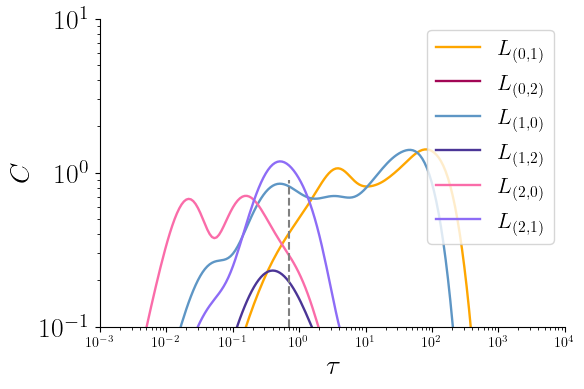

In [104]:
names = [f"$L_{{({int(l[0])},{int(l[1])})}}$" for l in laplacians_types]
f,ax = plt.subplots(1,1,figsize = (6,4))
for i in range(len(laplacians_types)):
    ax.loglog(tau_space,sp_heats[i],color = colors_curves[i+1],linewidth = 1.7,alpha = 1)
    #ax.semilogx(tau_space,sp_dims[i],linestyle = '--', color = colors_curves[i+1],linewidth = 1.7,alpha = 1)


ax.set_ylim([10**-1,10])
ax.set_xlim([10**-3,10**4])
#ax.set_yscale("symlog",linthresh = 0.01)
#ax.set_ylim([0, 3])
#ax.legend(names,fontsize = 14)

#ax.legend(["Entropic susceptibility", "Spectral dimension"],fontsize = 10)
ax.legend(names,fontsize = 16)


ax.set_xlabel(r"$\tau$",fontsize = 20)
ax.set_ylabel(r"$C$",fontsize = 20)

#plt.xticks([0.7,5,100,6000],fontsize = 20,labels=["$0.6$","$5$","$100$","$6000$"])

plt.yticks(fontsize = 20)

ax.vlines(x = 0.7,ymin = 10**-1,ymax = 0.9,linestyles="--",color = [0.5,0.5,0.5])

#ax.hlines(y =0.58,xmin=1,xmax = 48,linestyles='--',color = [0.5,0.5,0.5],alpha = 0.5)
#ax.hlines(y =1,xmin=100,xmax = 1000,linestyles='--',color = [0.5,0.5,0.5],alpha = 0.5)
#ax.hlines(y =2,xmin=8,xmax = 40,linestyles='--',color = [0.5,0.5,0.5],alpha = 0.5)
#ax.hlines(y =3,xmin=0.5,xmax = 2,linestyles='--',color = [0.5,0.5,0.5],alpha = 0.5)

sns.despine()
#plt.savefig(f'../Experiments_results/sas.pdf')

#plt.savefig(f'../Experiments_results/Diffusion_Laplacians/Heat_curves/mega_ladder_curves.pdf')
#plt.savefig(f'../Experiments_results/Diffusion_Laplacians/Heat_curves/RealData/asoiaf_curves_configuration.pdf')


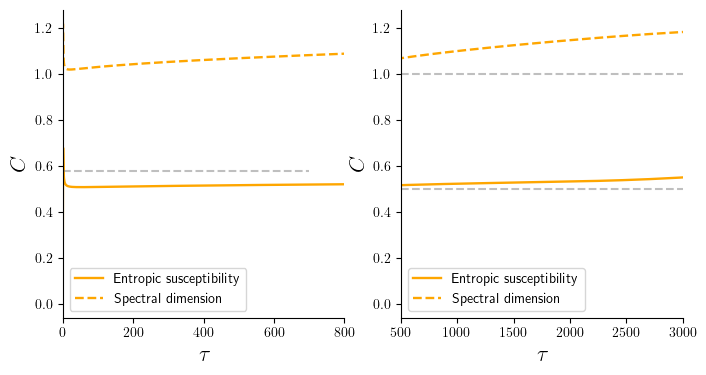

In [35]:
names = [f"$L_{{({int(l[0])},{int(l[1])})}}$" for l in laplacians_types]
f,ax = plt.subplots(1,2,figsize = (8,4))
for i in [0]:#range(len(laplacians_types)):
    ax[0].plot(tau_space,sp_heats[i],color = colors_curves[i+1],linewidth = 1.7,alpha = 1)
    ax[0].plot(tau_space,sp_dims[i],linestyle = '--', color = colors_curves[i+1],linewidth = 1.7,alpha = 1)
for i in [0]:#range(len(laplacians_types)):
    ax[1].plot(tau_space,sp_heats[i],color = colors_curves[i+1],linewidth = 1.7,alpha = 1)
    ax[1].plot(tau_space,sp_dims[i],linestyle = '--', color = colors_curves[i+1],linewidth = 1.7,alpha = 1)

#ax.set_ylim([10**-2,10])
ax[0].set_xlim([0,800])
ax[1].set_xlim([500,3000])

#ax.set_xlim([0, 0.8])
for i in range(2):
    ax[i].legend(["Entropic susceptibility", "Spectral dimension"],fontsize = 10)
    ax[i].set_xlabel(r"$\tau$",fontsize = 16)
    ax[i].set_ylabel(r"$C$",fontsize = 16)
    #ax[i].set_xticks(fontsize = 16)
    #ax[i].set_yticks(fontsize = 16)

ax[0].hlines(y =0.58,xmin=0.2,xmax = 700,linestyles='--',color = [0.5,0.5,0.5],alpha = 0.5)
ax[1].hlines(y =1,xmin=500,xmax = 3000,linestyles='--',color = [0.5,0.5,0.5],alpha = 0.5)
ax[1].hlines(y =0.5,xmin=500,xmax = 3000,linestyles='--',color = [0.5,0.5,0.5],alpha = 0.5)

sns.despine()
#plt.savefig(f'../Experiments_results/Diffusion_Laplacians/Heat_curves/mega_grid.pdf')



### Plot all curves 

NameError: name 'nrep' is not defined

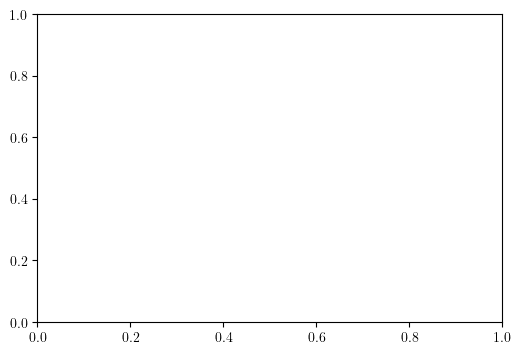

In [12]:
names = [f"$L_{{({int(l[0])},{int(l[1])})}}$" for l in laplacians_types]
f,ax = plt.subplots(1,1,figsize = (6,4))




for i in range(len(laplacians_types)):
    #for n in range(10):
    #    plt.loglog(tau_space,sp_heats[i][n],color = colors_curves[i+1],linewidth = 1,alpha = 0.2,label = "")
    sp_heats_std = np.std(sp_heats[i],0)
    sp_heats_mean = np.mean(sp_heats[i],0)
    ax.fill_between(tau_space, sp_heats_mean + 1.96*sp_heats_std/np.sqrt(nrep),sp_heats_mean - 1.96*sp_heats_std/np.sqrt(nrep), alpha=0.4, color = colors_curves[i+1])
    ax.semilogx(tau_space,sp_heats_mean, color = colors_curves[i+1],linewidth = 1.7, label = f"$L_{{({laplacians_types[i][0]},{laplacians_types[i][1]})}}$")


# for i in range(len(laplacians_types)):
#     means = np.mean(np.array(sp_heats[i]),0)
#     stds = np.sqrt((nrep-1)/(nrep))*np.std(np.array(sp_heats[i]),0)
#     ax.fill_between(tau_space, means - stds,means + stds, color = colors_curves[i+1],alpha = 0.3,label = "")
#     ax.loglog(tau_space,means,color = colors_curves[i+1],linewidth = 1.7,alpha = 1,label = names[i])

ax.set_xscale("log")
ax.set_yscale("log")

ax.set_ylim([10**-1,15])

ax.set_xlim([10**-2,10**5])
ax.legend(fontsize = 14)
ax.set_xlabel(r"$\tau$",fontsize = 16)
ax.set_ylabel(r"$C$",fontsize = 16)
plt.xticks([10**-1,10**1,10**3,10**5],fontsize = 20)
plt.yticks(fontsize = 20)


#ax.hlines(y =1.2,xmin=0.6,xmax = 20, linestyles='--',color = [0.5,0.5,0.5])
#ax.hlines(y =1,xmin=100,xmax = 1*10**4,linestyles='--',color = [0.5,0.5,0.5])
ax.vlines(x =0.8,ymin=0.1,ymax =2,linestyles='--',color = [0.5,0.5,0.5])

sns.despine()
#plt.savefig(f'../Experiments_results/Diffusion_Laplacians/Heat_curves/RealData/{name}_curves.pdf')
#plt.savefig(f'../Experiments_results/Diffusion_Laplacians/Heat_curves/NGF/d{d}s{s}_{N}nodes_{nrep}rep.pdf')


## Mean scale

In [61]:
sparse = False
num_eigs = 500

# Define strings which specify the Laplacians to consider
laplacians_types = ["01","02","10","12","20","21"]
#laplacians_types = ["12"]
#laplacians_types = ["01","10"]
#laplacians_types = ["01","02","12"]
#laplacians_types = ["01","03","13","23"]
#laplacians_types = ["01","04","14","24","34"]




Laplacians = []
for l in laplacians_types:
    L = scomplex.diffusion_laplacian(sc, k=int(l[0]), l=int(l[1]),sparse = sparse)
    Laplacians.append(L)

# Compute eigenvalues of the Laplacians and their specific heat curves
taumin = -3 # Heat curve starts from 10**taumin
taumax = 5 # Heat curve ends at 10**taumax
ntau = 200 # Number of taus to consider in the interval

eigs = []
average_scales = []
log_returns = []

tau_space = np.logspace(taumin, taumax, num=ntau)

for i in range(len(Laplacians)):
    print(i)
    L = Laplacians[i]
    D,U = np.linalg.eig(L)
    D = np.sort((np.real(D)))
    N = len(D)
    average_scale = np.zeros(ntau)
    log_return = np.zeros(ntau)

    for t in range(ntau):
        tau = tau_space[t]
        Z = np.sum(np.exp(-tau*D))
        for j in range(N):
            average_scale[t] = average_scale[t] + D[j]*np.exp(-tau*D[j])
        average_scale[t] = average_scale[t]/Z
        log_return[t] = np.log(Z)

    average_scales.append(average_scale/np.log(N))
    log_returns.append(log_return/np.log(N))



0
1
2
3
4
5


## Plot graph

In [62]:
# Load real data

names = ["asoiaf", "ego-facebook","subelj_euroroad_euroroad", "dimacs10-netscience", "arenas-email", "celegans", "ecoli", "mmusculus", "drosophila"]

matrices = []
for name in names:
    j = 0
    with open(f'../Experiments_results/Diffusion_Laplacians/Heat_curves/RealData/sp_heats/{name}_sp_heats.pickle', 'rb') as handle:
        sp_heats = pickle.load(handle)

    d = int((-1+np.sqrt(1+4*len(sp_heats)))/2)
    laplacians_types = [f"{k}{m}" for k in range(d+1) for m in range(d+1) if m!=k]
    tau_space = np.logspace(-5,5,200)[:200-1]

    measure = np.zeros(len(laplacians_types))
    for i in range(len(laplacians_types)):
        measure[i] = measure_SI(tau_space,sp_heats[i],l=0.2,ymin = -4,ymax = 2,ny = 100)

    measure_matrix = np.zeros((d+1,d+1))
    for k in range(len(laplacians_types)):
        measure_matrix[int(laplacians_types[k][0]),int(laplacians_types[k][1])] = measure[k]
    matrices.append(measure_matrix)

/var/folders/f6/5t2dxw1n72nf__cgdxs0x8m80000gn/T/ipykernel_7381/509489392.py:5: RuntimeWarning: divide by zero encountered in log
  sp_heat =  np.log(sp_heat)
/var/folders/f6/5t2dxw1n72nf__cgdxs0x8m80000gn/T/ipykernel_7381/509489392.py:5: RuntimeWarning: invalid value encountered in log
  sp_heat =  np.log(sp_heat)


## Renormalize

In [101]:
lmax = 2
diff_order =0
int_order = 1
tau = 0.16
PLOT = False # Plotting might be very slow
VERBOSE = True

sequence = renormalize.renormalize_steps(sc,lmax = lmax,tau = tau, diff_order = diff_order, int_order = int_order, PLOT = PLOT, VERBOSE = VERBOSE, SAVENAME = None)


1133
727


In [33]:
diff_order = 1
int_order = 2
new_sc, mapnodes, clusters = renormalize.renormalize_single_step(sc, tau =2, diff_order = diff_order, int_order = int_order, D = None, U = None)

33


#### Renormalize & Plot

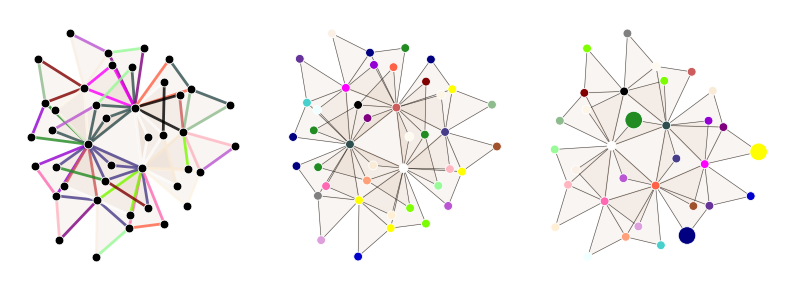

In [34]:
layout = [0,0]
G = nx.from_edgelist(sc["edges"])
layout[0] = nx.kamada_kawai_layout(G)

G = nx.from_edgelist(new_sc["edges"])
layout[1] = nx.kamada_kawai_layout(G)
    
colors_clusters = list(mcolors.CSS4_COLORS.values())
np.random.shuffle(colors_clusters)

values, counts = np.unique(mapnodes, return_counts=True)

f,ax = plt.subplots(1,3,figsize = (8,3))

if diff_order == 2:
    for i in range(sc["n2"]):
        f = sc["faces"][i, :]
        x = [layout[0][f[0]][0], layout[0][f[1]][0], layout[0][f[2]][0]]
        y = [layout[0][f[0]][1], layout[0][f[1]][1], layout[0][f[2]][1]]
        ax[0].fill(x, y, color= colors_clusters[np.mod(clusters[i],len(colors_clusters))], alpha=0.3)

    nx.draw(nx.from_edgelist(sc["edges"]), pos = layout[0],node_size = 40,width = 0.4,node_color = 'k',ax = ax[0],edge_color = [0.1,0.1,0.1])
elif diff_order == 1:
    for i in range(sc["n2"]):
        f = sc["faces"][i, :]
        x = [layout[0][f[0]][0], layout[0][f[1]][0], layout[0][f[2]][0]]
        y = [layout[0][f[0]][1], layout[0][f[1]][1], layout[0][f[2]][1]]
        ax[0].fill(x, y, color= [201/255,162/255,131/255], alpha=0.1)

    nx.draw(nx.from_edgelist(sc["edges"]), pos = layout[0],node_size = 40,width = 2,node_color = 'k',ax = ax[0],edge_color = [colors_clusters[np.mod(clusters[i],len(colors_clusters))] for i in range(sc["n1"])])

for i in range(sc["n2"]):
    f = sc["faces"][i, :]
    x = [layout[0][f[0]][0], layout[0][f[1]][0], layout[0][f[2]][0]]
    y = [layout[0][f[0]][1], layout[0][f[1]][1], layout[0][f[2]][1]]
    ax[1].fill(x, y, color= [201/255,162/255,131/255], alpha=0.1)

for i in range(new_sc["n2"]):
    f = new_sc["faces"][i, :]
    x = [layout[1][f[0]][0], layout[1][f[1]][0], layout[1][f[2]][0]]
    y = [layout[1][f[0]][1], layout[1][f[1]][1], layout[1][f[2]][1]]
    ax[2].fill(x, y, color= [201/255,162/255,131/255], alpha=0.1)

nx.draw(nx.from_edgelist(sc["edges"]), pos = layout[0],node_size = 40,width = 0.4,node_color = [colors_clusters[np.mod(m,len(colors_clusters))] for m in mapnodes],ax = ax[1],edge_color = [0.1,0.1,0.1])
nx.draw(nx.from_edgelist(new_sc["edges"]), pos = layout[1],node_size = counts*40,width = 0.4,node_color = [colors_clusters[np.mod(m,len(colors_clusters))] for m in range(new_sc["n0"])],ax = ax[2],edge_color = [0.1,0.1,0.1])


for i in range(3):
    ax[i].collections[1].set_alpha(0.8)
    ax[i].collections[0].set_linewidth(0.6) 
    ax[i].collections[0].set_edgecolor("#FFFFFF") 




plt.tight_layout()
#plt.savefig(f"../Experiments_results/Diffusion_Laplacians/Renormalizations/RealData/renormalsize_email_L02.pdf")


#### Renormalize & Plot change tau

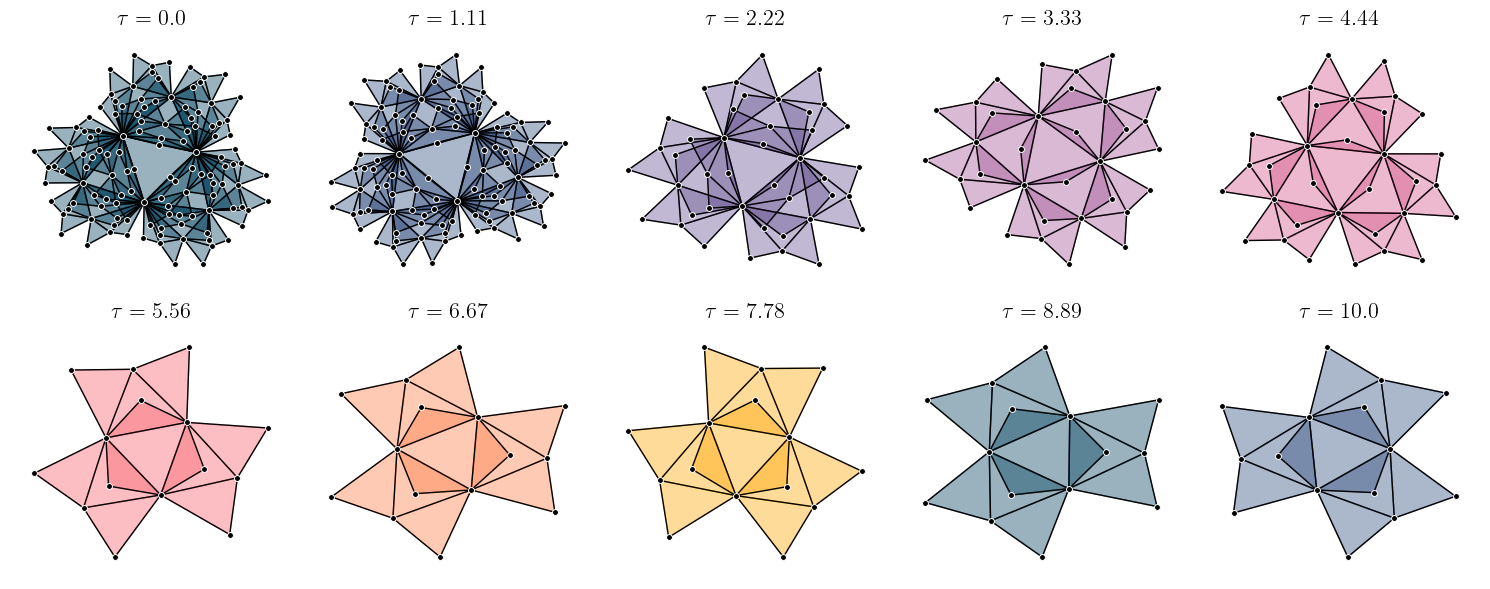

In [23]:
nplots = 10
diff_order = 1
int_order = 2
tau_max = 10

f,axs = plt.subplots(2,nplots//2,figsize = (nplots//2*3,2*3))
tau_space = np.linspace(0,tau_max,nplots)

L = scomplex.diffusion_laplacian(sc,diff_order,int_order)
D, U = scipy.linalg.eigh(L)

for t,tau in enumerate(tau_space):
    ax = axs[t//(nplots//2),np.mod(t,nplots//2)]
    new_sc,__,__ = renormalize.renormalize_single_step(sc,tau,diff_order,int_order,D,U,VERBOSE=False)
    col = colors_sequential[t]
    plotting.plot_complex(new_sc,ax = ax,face_color=[col],face_alpha=0.4,node_size=18,iterations=2000)
   

    ax.set_title(r"$\tau = "+f"{np.round(tau,2)}$",fontsize = 16)
    #ax[i].collections[1].set_alpha(0.8)
    ax.collections[0].set_linewidth(0.7) 
    ax.collections[0].set_edgecolor("#FFFFFF") 

plt.tight_layout()
plt.savefig(f"../Experiments_results/Diffusion_Laplacians/Renormalizations/Pseudofractal/L{diff_order}{int_order}_change_tau.pdf")


#### Degrees

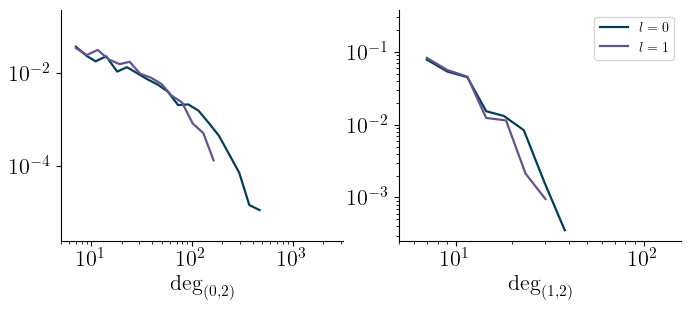

In [77]:
d = 2
f,axs = plt.subplots(1,d,figsize = (4*(d),3))
for l in range(lmax):
    sc2 = sequence[l]
    for i in range(d):
        A = scomplex.adjacency_of_order(sc2,i,d)
        deg = np.sum(A,0)#/(scipy.special.comb(d+1,i+1)-1)
        pwl.plot_pdf(deg[deg>0],ax = axs[i],linewidth = 1.6,color = colors_sequential[2*l])

plt.legend([f"$l = {l}$" for l in range(lmax)])
for i in range(d):
    axs[i].set_xlabel(r"$\mathrm{deg}_"+f"{{({i},{d})}}$",fontsize = 16)
    axs[i].xaxis.set_tick_params(labelsize=16)
    axs[i].yaxis.set_tick_params(labelsize=16)
    if i == 0:
        axs[i].set_xlim([5,10**3.5])
    else:
        axs[i].set_xlim([5,10**2.2])


sns.despine()
#plt.savefig(f"../Experiments_results/Diffusion_Laplacians/Renormalizations/NGF/renormalize_degrees_d2s1_L{diff_order}{int_order}_nodes1300_tau0p1.pdf")


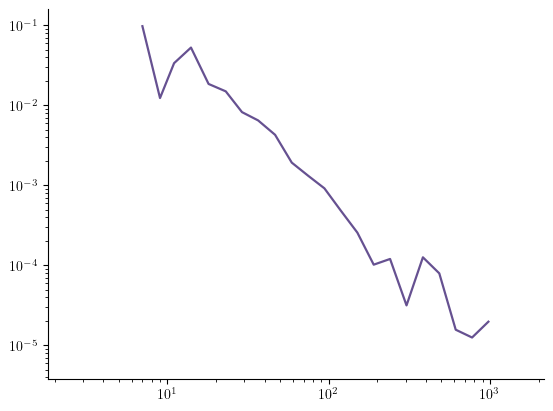

In [83]:
A = scomplex.adjacency_of_order(sc,0,2)
deg = np.sum(A,0)#/(scipy.special.comb(d+1,i+1)-1)
pwl.plot_pdf(deg[deg>0],linewidth = 1.6,color = colors_sequential[2*1])

sns.despine()
#plt.savefig(f"../Experiments_results/Diffusion_Laplacians/Renormalizations/NGF/renormalize_degrees_d2s1_L{diff_order}{int_order}_nodes1300_tau0p1.pdf")


#### Check that the plateau is preserved

In [104]:
taumin = -4
taumax = 4
ntau = 200

diff_order = 2
int_order = 0

D, U = np.linalg.eigh(scomplex.diffusion_laplacian(sc,diff_order,int_order))
specific_heat,tau_space, __ = renormalize.compute_heat(D,taumin,taumax,ntau)

/Users/marconurisso/Desktop/Lavoro/Simplicial_Renormalization/HodgeLaplacianRenorm/hodge_renormalization/HOLR/Experiments_setups/../Functions/renormalize.py:30: RuntimeWarning: overflow encountered in exp
  mu[i] = 1 / np.sum(np.exp(-tau * (D - D[i])))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


In [123]:
tauref = 0.07
taustar = 0.01

diff_order_ren = 2
int_order_ren = 0

new_sc_ref, mapnodes, clusters = renormalize.renormalize_single_step(sc, tau = tauref, diff_order = 0, int_order = 1, D = None, U = None)
#new_sc, mapnodes, clusters = renormalize.renormalize_single_step(sc, tau = taustar, diff_order = diff_order_ren, int_order = int_order_ren, D = D, U = U)

Lnew_ref = scomplex.diffusion_laplacian(new_sc_ref, diff_order,int_order)
Dnew_ref, __ = np.linalg.eigh(Lnew_ref)
new_specific_heat_ref,tau_space, __ = renormalize.compute_heat(Dnew_ref,taumin,taumax,ntau)

#Lnew = scomplex.diffusion_laplacian(new_sc, diff_order,int_order)
#Dnew, __ = np.linalg.eigh(Lnew)
#new_specific_heat,tau_space, __ = renormalize.compute_heat(Dnew,taumin,taumax,ntau)


537


/Users/marconurisso/Desktop/Lavoro/Simplicial_Renormalization/HodgeLaplacianRenorm/hodge_renormalization/HOLR/Experiments_setups/../Functions/renormalize.py:30: RuntimeWarning: overflow encountered in exp
  mu[i] = 1 / np.sum(np.exp(-tau * (D - D[i])))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


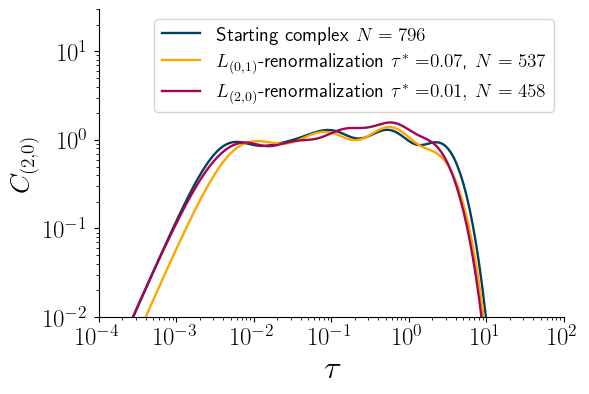

In [124]:
f,ax = plt.subplots(1,1,figsize = (6,4))

ax.loglog(tau_space,specific_heat,color = colors_curves[0],linewidth = 1.7)
ax.loglog(tau_space,new_specific_heat_ref,color = colors_curves[1],linewidth = 1.7)
ax.loglog(tau_space,new_specific_heat,color = colors_curves[2],linewidth = 1.7)

Ni = sc["n0"]
Nref = new_sc_ref["n0"]
Nnew = new_sc["n0"]

ax.set_ylim([10**-2,30])
ax.set_xlim([10**-4,10**2])
ax.legend(["Starting complex" + f" $N = {Ni}$ ","$L_{(0,1)}$-renormalization"+r" $\tau^* = $"+f"${np.round(tauref,2)}$," + f" $N = {Nref}$ ",f"$L_{{({diff_order_ren},{int_order_ren})}}$-renormalization"+r" $\tau^* = $"+f"${np.round(taustar,2)},$" + f" $N = {Nnew}$ "],fontsize = 14)
ax.set_xlabel(r"$\tau$",fontsize = 24)
ax.set_ylabel(f"$C_{{({diff_order},{int_order})}}$",fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
#ax.hlines(y = 1,xmin=5,xmax = 800,linestyles='--',color = [0.5,0.5,0.5])
sns.despine()

#plt.savefig(f"../Experiments_results/Diffusion_Laplacians/Renormalizations/RealData/renormalize_asoiaf_C_{diff_order}{int_order}.pdf")



### Single step

In [199]:
Li = scomplex.diffusion_laplacian(sc, 0,1)
Di, __ = np.linalg.eigh(Li)
specific_heat, tau_space, __ = renormalize.compute_heat(Di,-3,4,200)

/Users/marconurisso/Desktop/Lavoro/Simplicial_Renormalization/HodgeLaplacianRenorm/hodge_renormalization/Hodge_renorm/Experiments_setups/../Functions/renormalize.py:305: RuntimeWarning: overflow encountered in exp
  mu[i] = 1 / np.sum(np.exp(-tau * (D - D[i])))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


In [176]:
L01 = scomplex.diffusion_laplacian(sc,0,1)
D01,U01 = np.linalg.eigh(L01)
Lx = scomplex.diffusion_laplacian(sc,1,0)
Dx,Ux = np.linalg.eigh(Lx)

In [184]:
new_sc01,_ = renormalize.renormalize_single_step(sc, tau = 1, diff_order =0, int_order = 1, D = D01, U = U01)

830


In [185]:
Lnew01 = scomplex.diffusion_laplacian(new_sc01, 0,1)
Dnew01, __ = np.linalg.eigh(Lnew01)
specific_heat01,tau_space, __ = renormalize.compute_heat(Dnew01,-3,4,200)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/marconurisso/Desktop/Lavoro/Simplicial_Renormalization/HodgeLaplacianRenorm/hodge_renormalization/Hodge_renorm/Experiments_setups/../Functions/renormalize.py:305: RuntimeWarning: overflow encountered in exp
  mu[i] = 1 / np.sum(np.exp(-tau * (D - D[i])))


In [192]:
new_scx,_ = renormalize.renormalize_single_step(sc, tau = 1.1, diff_order = 1, int_order = 0, D = Dx, U = Ux)

804


In [207]:
Lnewx = scomplex.diffusion_laplacian(new_scx, 0,1)
Dnewx, __ = np.linalg.eigh(Lnewx)
specific_heatx,tau_space, __ = renormalize.compute_heat(Dnewx,-3,4,200)


/Users/marconurisso/Desktop/Lavoro/Simplicial_Renormalization/HodgeLaplacianRenorm/hodge_renormalization/Hodge_renorm/Experiments_setups/../Functions/renormalize.py:305: RuntimeWarning: overflow encountered in exp
  mu[i] = 1 / np.sum(np.exp(-tau * (D - D[i])))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Text(0.5, 1.0, '\\emph{C. Elegans}')

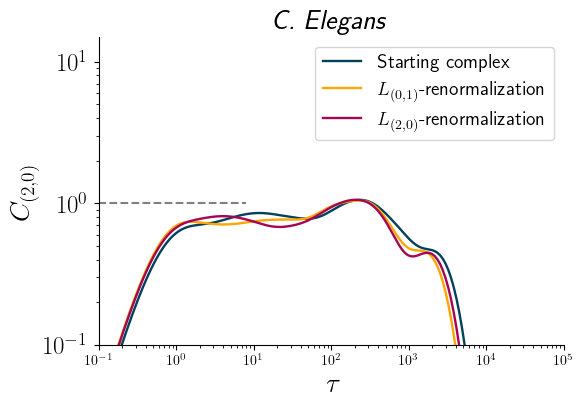

In [208]:
f,ax = plt.subplots(1,1,figsize = (6,4))
ax.loglog(np.logspace(-3,4,200)[1:],specific_heat,color = colors_curves[0],linewidth = 1.7, label = "Starting complex")
ax.loglog(tau_space,specific_heat01,color = colors_curves[1],linewidth = 1.7, label = "$L_{{(0,1)}}$-renormalization")
ax.loglog(tau_space,specific_heatx,color = colors_curves[2],linewidth = 1.7, label = "$L_{{(2,0)}}$-renormalization")

#ax.loglog(tau_space,sp_heats_ren2[1],color = colors[2],linewidth = 1.7)
ax.set_ylim([10**-1,15])
ax.set_xlim([10**-1,10**5])
ax.legend(fontsize = 14)
ax.set_xlabel(r"$\tau$",fontsize = 20)
ax.set_ylabel(r"$C_{{(2,0)}}$",fontsize = 20)
#plt.xticks([10**-3,10**-1,10**1],fontsize = 18)
plt.yticks(fontsize = 18)
ax.hlines(y = 1,xmin=0.002,xmax = 8,linestyles='--',color = [0.5,0.5,0.5])
sns.despine()
plt.title("\emph{C. Elegans}",fontsize = 20)
#ax.legend()

#plt.savefig(f"../Experiments_results/Diffusion_Laplacians/Renormalizations/RealData/renormalize_plateau_celegans.pdf")


### Single step change tau

In [75]:
sc = PF21(6)

In [148]:
diff_order_r = 0
int_order_r = 1
diff_order_SI = 0
int_order_SI = 1

L = scomplex.diffusion_laplacian(sc,diff_order_r,int_order_r)
D,U = np.linalg.eigh(L)

tau_range = np.linspace(0,2,10)
sp_heats_r = []
SI_r = np.zeros(len(tau_range))
for t,tau in enumerate(tau_range):
    print(t)
    new_sc,__,__ = renormalize.renormalize_single_step(sc, tau = tau, diff_order =diff_order_r, int_order = int_order_r, D = D, U = U)
    Lnew = scomplex.diffusion_laplacian(new_sc, diff_order_SI,int_order_SI)
    Dnew, __ = np.linalg.eigh(Lnew)
    specific_heat_new,tau_space, __ = renormalize.compute_heat(Dnew,-3,4,200)
    sp_heats_r.append(specific_heat_new)
    SI_r[t] = measure_SI(tau_space,specific_heat_new,0.2)

0
379


/Users/marconurisso/Desktop/Lavoro/Simplicial_Renormalization/HodgeLaplacianRenorm/hodge_renormalization/HOLR/Experiments_setups/../Functions/renormalize.py:30: RuntimeWarning: overflow encountered in exp
  mu[i] = 1 / np.sum(np.exp(-tau * (D - D[i])))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


1
336
2
162
3
80
4
60
5
47


/var/folders/f6/5t2dxw1n72nf__cgdxs0x8m80000gn/T/ipykernel_10790/509489392.py:5: RuntimeWarning: divide by zero encountered in log
  sp_heat =  np.log(sp_heat)


6
44
7
40
8
31
9
23


(0.01, 10)

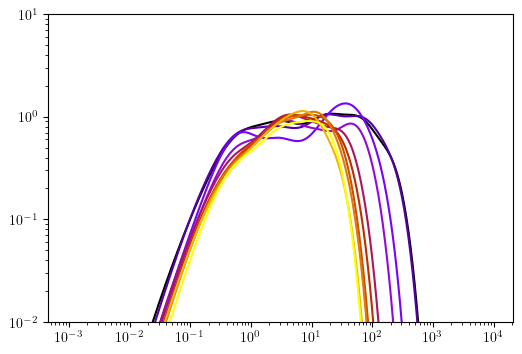

In [142]:
cmap = plt.get_cmap('gnuplot')
colors = [cmap(i) for i in np.linspace(0, 1, len(tau_range))]

f,ax = plt.subplots(1,1,figsize = (6,4))
for t,tau in enumerate(tau_range):
    ax.loglog(tau_space,sp_heats_r[t],color = colors[t])

plt.xlim()
plt.ylim([10**-2,10**1])
#plt.legend(tau_range)

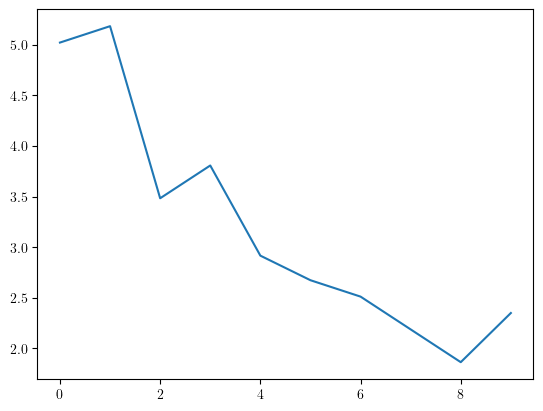

In [149]:
plt.plot(SI_r)

## Renormalize compute curves average

In [410]:
d = 3
N = 2000
nrep = 10
lmax = 2
diff_order =  0
int_order = 1
tau = 0.1
taumin = -2
taumax = 5
ntau = 100
PLOT = False # Plotting might be very slow
VERBOSE = True

sp_heats_ren = []
degs = [[np.array([]) for _ in range(lmax)] for _ in range(d)]
for i in range(nrep):
    print(f"Repetition: {i}")
    sc = scomplex.NGF(d,N,1,0.1,1)
    sequence = renormalize.renormalize_steps(sc,lmax = lmax,tau = tau, diff_order = diff_order, int_order = int_order, PLOT = PLOT, VERBOSE = VERBOSE, SAVENAME = None)
    for l in range(lmax):
        scc = sequence[l]
        Lnew = scomplex.diffusion_laplacian(scc, 1, 2)
        Dnew, Unew = np.linalg.eigh(Lnew)
        specific_heat,tau_space, __ = renormalize.compute_heat(Dnew,taumin,taumax,ntau)
        if i == 0:
            sp_heats_ren.append(specific_heat/nrep)
        else:
            sp_heats_ren[l] += specific_heat/nrep

        for j in range(d):
            A = scomplex.adjacency_of_order(scc,j,d)
            deg = np.sum(A,0)/(scipy.special.comb(d+1,j+1)-1)
            degs[j][l] = np.append(degs[j][l],deg)


Repetition: 0
2000
788


KeyboardInterrupt: 

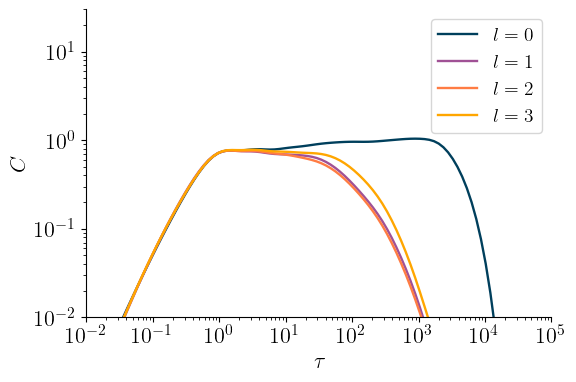

In [350]:
#Ns = [sequence[l]["n0"] for l in range(lmax)]
names = [f"$l = {l}$" for l in range(lmax)]
f,ax = plt.subplots(1,1,figsize = (6,4))
for i in range(lmax):
    ax.loglog(tau_space,sp_heats_ren[i],color = colors[i],linewidth = 1.7)
ax.set_ylim([10**-2,30])
ax.set_xlim([10**-2,10**taumax])
ax.legend(names,fontsize = 14)
ax.set_xlabel(r"$\tau$",fontsize = 16)
ax.set_ylabel(r"$C$",fontsize = 16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
#ax.hlines(y = 1,xmin=5,xmax = 800,linestyles='--',color = [0.5,0.5,0.5])
sns.despine()

#plt.savefig(f"../Experiments_results/Diffusion_Laplacians/Renormalizations/NGF/renormalize_plateau_d2s1_L{diff_order}{int_order}_nodes1300_tau0p8.pdf")


## Plot curves repeat

In [117]:
nrep = 50
N = 200
taumin = -3 # Heat curve starts from 10**taumin
taumax = 5 # Heat curve ends at 10**taumax
ntau = 200 # Number of taus to consider in the interval

for n in range(nrep):
    print(n)
    G = nx.random_tree(n = N)
    G = subdivide(G)
    G = subdivide(G)
    sc = scomplex.convert_graph_to_sc(G,dim = 1)
    L = scomplex.diffusion_laplacian(sc,0,1)
    D,U = np.linalg.eigh(L)
    D = np.abs(D)
    specific_heat,tau_space, __ = renormalize.compute_heat(D,taumin,taumax,ntau)
    spectral_dimension,tau_space = compute_spectral_d(D,taumin,taumax,ntau)
    if n == 0:
        #sp_heat = specific_heat/nrep
        #sp_dim = spectral_dimension/nrep
        sp_heat = sp_heat*50/(50+nrep) +  specific_heat/nrep
        sp_dim = sp_dim*50/(50+nrep) +  spectral_dimension/nrep
    else:
        sp_heat += specific_heat/nrep
        sp_dim += spectral_dimension/nrep

0


/Users/marconurisso/Desktop/Lavoro/Simplicial_Renormalization/HodgeLaplacianRenorm/hodge_renormalization/Hodge_renorm/Experiments_setups/../Functions/renormalize.py:305: RuntimeWarning: overflow encountered in exp
  mu[i] = 1 / np.sum(np.exp(-tau * (D - D[i])))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


/var/folders/f6/5t2dxw1n72nf__cgdxs0x8m80000gn/T/ipykernel_13355/3934631811.py:7: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim([0,12])


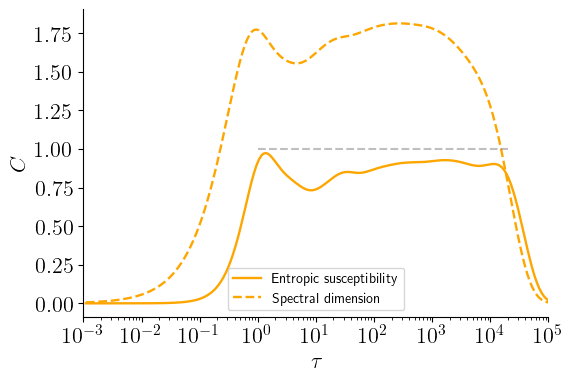

In [119]:
f,ax = plt.subplots(1,1,figsize = (6,4))

ax.semilogx(tau_space,sp_heat,color = colors_curves[1],linewidth = 1.7,alpha = 1)
ax.semilogx(tau_space,sp_dim,linestyle = '--', color = colors_curves[1],linewidth = 1.7,alpha = 1)

#ax.set_ylim([10**-2,10])
ax.set_xlim([0,12])
ax.set_xlim([10**-3,10**5])
#ax.set_xlim([0, 0.8])

ax.legend(["Entropic susceptibility", "Spectral dimension"],fontsize = 10)
ax.set_xlabel(r"$\tau$",fontsize = 16)
ax.set_ylabel(r"$C$",fontsize = 16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

#ax.hlines(y =0.58,xmin=1,xmax = 48,linestyles='--',color = [0.5,0.5,0.5],alpha = 0.5)
ax.hlines(y =1,xmin=1,xmax = 20000,linestyles='--',color = [0.5,0.5,0.5],alpha = 0.5)

sns.despine()
#plt.savefig(f'../Experiments_results/Diffusion_Laplacians/Heat_curves/chain_curves.pdf')
#plt.savefig(f'../Experiments_results/Diffusion_Laplacians/Heat_curves/Pseudofractal/pseudofractal_21.pdf')


## Measure how the SIP changes with tau^*

In [43]:
lmax = 2
diff_order = 2
int_order = 0
ntau_ren = 10
tau_range = np.linspace(0,0.3,ntau_ren)

taumin = -5
taumax = 2
ntau = 100
measure = np.zeros(ntau_ren)
for t in range(ntau_ren):
    print(t)
    tau = tau_range[t]
    sequence = renormalize.renormalize_steps(sc,lmax = lmax,tau = tau, diff_order = diff_order, int_order = int_order, PLOT = False, VERBOSE = False, SAVENAME = None)
    scc = sequence[-1]
    Lnew = scomplex.diffusion_laplacian(scc, 2,0)
    Dnew, Unew = np.linalg.eigh(Lnew)
    specific_heat,tau_space, __ = renormalize.compute_heat(Dnew,taumin,taumax,ntau)
    measure[t] = measure_SI(tau_space,specific_heat,l=0.2)


0


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/marconurisso/Desktop/Lavoro/Simplicial_Renormalization/HodgeLaplacianRenorm/hodge_renormalization/Hodge_renorm/Experiments_setups/../Functions/renormalize.py:305: RuntimeWarning: overflow encountered in exp
  mu[i] = 1 / np.sum(np.exp(-tau * (D - D[i])))


1
2
3
4


/var/folders/f6/5t2dxw1n72nf__cgdxs0x8m80000gn/T/ipykernel_673/509489392.py:5: RuntimeWarning: divide by zero encountered in log
  sp_heat =  np.log(sp_heat)
/var/folders/f6/5t2dxw1n72nf__cgdxs0x8m80000gn/T/ipykernel_673/509489392.py:5: RuntimeWarning: invalid value encountered in log
  sp_heat =  np.log(sp_heat)


5
6
7
8
9


In [44]:
measure20 = measure

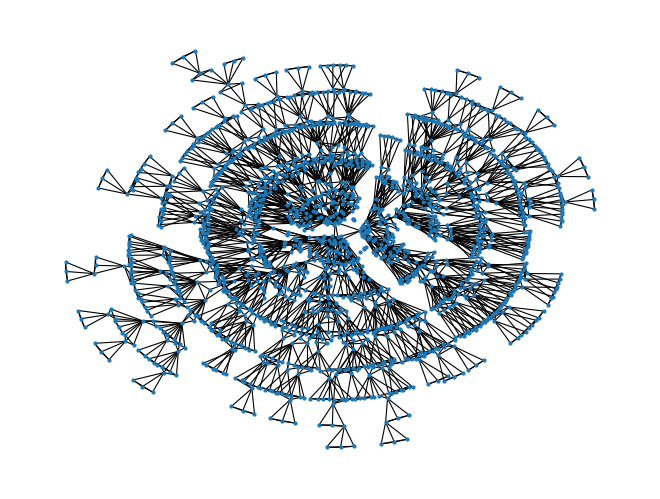

In [6]:
k = 2
l = 3
A = scomplex.adjacency_of_order(scc,k,l,False)
G = nx.from_numpy_matrix(A)
weights = [0.8*G[u][v]['weight'] for u,v in G.edges]

layout = nx.kamada_kawai_layout(G)
nx.draw(G,pos = layout,node_size = 4,width = weights)
#plt.savefig(f'../Experiments_results/Diffusion_Laplacians/Graphs/Tree_21_G{k}{l}.pdf')

In [44]:
Dnew = np.abs(Dnew)
tau_space = np.logspace(-2, 4, num=200)
S = np.zeros(200)
for t in range(200):
    tau = tau_space[t]
    mu = np.zeros(scc["n2"])
    for i in range(scc["n2"]):
        mu[i] = 1 / np.sum(np.exp(-tau * (D - D[i])))

    mu = mu[mu > 0]
    S[t] = -np.sum(mu * np.log(mu))

IndexError: index 1492 is out of bounds for axis 0 with size 1492

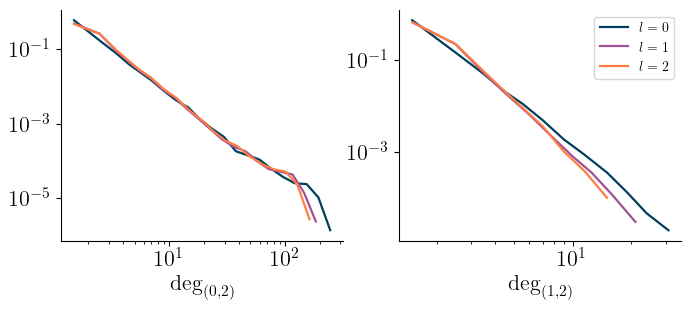

In [33]:
f,axs = plt.subplots(1,d,figsize = (4*(d),3))
for l in range(lmax):
    for i in range(d):
        pwl.plot_pdf(degs[i][l][degs[i][l]>0],ax = axs[i],linewidth = 1.6,color = colors_sequential[3*l])

plt.legend([f"$l = {l}$" for l in range(lmax)])
for i in range(d):
    axs[i].set_xlabel(r"$\mathrm{deg}_"+f"{{({i},{d})}}$",fontsize = 16)
    axs[i].xaxis.set_tick_params(labelsize=16)
    axs[i].yaxis.set_tick_params(labelsize=16)


sns.despine()
plt.savefig(f"../Experiments_results/Diffusion_Laplacians/Renormalizations/NGF/renormalize_degrees_d2s1_L{diff_order}{int_order}_nodes1300_tau0p8.pdf")


## Plot curves increase N

In [461]:
steps_list = [2,3,4,5,6,7]
laplacians_types = ["01","02","10","12","20","21"]

#steps_list = [300,500,700,900,1100,1500]
taumin = -2
taumax = 4
ntau = 200

diff_order = 0
int_order = 1

measure = np.zeros((len(steps_list),len(laplacians_types)))
Ns = []
for s in range(len(steps_list)):
    print(s)
    sc = PF21(steps_list[s])
    for l in range(len(laplacians_types)):    
        lt = laplacians_types[l]
        L = scomplex.diffusion_laplacian(sc, k=int(lt[0]), l=int(lt[1]),sparse = sparse)
        D,U = np.linalg.eigh(L)
        D = np.abs(D)
        specific_heat,tau_space, __ = renormalize.compute_heat(D,taumin,taumax,ntau)
        measure[s,l] = measure_SI(tau_space,specific_heat,l=0.2,ymin = -4,ymax = 2,ny = 100)
       

0


/Users/marconurisso/Desktop/Lavoro/Simplicial_Renormalization/HodgeLaplacianRenorm/hodge_renormalization/Hodge_renorm/Experiments_setups/../Functions/renormalize.py:305: RuntimeWarning: overflow encountered in exp
  mu[i] = 1 / np.sum(np.exp(-tau * (D - D[i])))
/var/folders/f6/5t2dxw1n72nf__cgdxs0x8m80000gn/T/ipykernel_1042/509489392.py:5: RuntimeWarning: divide by zero encountered in log
  sp_heat =  np.log(sp_heat)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


1
2
3
4
5


## Plot curves increase d

## Compute measures normalized

## Compute measure normalized PF

In [110]:
laplacians_types = ["01","02","10","12","20","21"]
laplacians_types = ["10"]
#laplacians_types = ["01","02","03","10","12","13","20","21","23","30","31","32"]

steps = [3,4,5,6,7]
# Compute eigenvalues of the Laplacians and their specific heat curves
taumin = -3 # Heat curve starts from 10**taumin
taumax = 5 # Heat curve ends at 10**taumax
ntau = 200 # Number of taus to consider in the interval

measures = np.zeros((len(steps),len(laplacians_types)))

for n,s in enumerate(steps):
    sc = PF21(s)
    print(s)
    for l in range(len(laplacians_types)):    
        lap_type = laplacians_types[l]     
        L = scomplex.diffusion_laplacian(sc,int(lap_type[0]),int(lap_type[1]))  
        D,U = np.linalg.eigh(L)
        D = np.abs(D)
        specific_heat,tau_space, __ = renormalize.compute_heat(D,taumin,taumax,ntau)
        measure = renormalize.measure_SI(tau_space,specific_heat,0.2,ymin = -4,ymax = 2,ny = 100)
        measures[n,l] = measure#/np.log(sc[f"n{int(lap_type[0])}"])

3


/Users/marconurisso/Desktop/Lavoro/Simplicial_Renormalization/HodgeLaplacianRenorm/higher_order_LRG/HOLR/Experiments_setups/../Functions/renormalize.py:71: RuntimeWarning: divide by zero encountered in log
  sp_heat =  np.log(sp_heat)


4
5
6
7


In [192]:
sc = PF21(4)

ren_types = ["01","12"]#,"02","10","12","20","21"]
laplacians_types = ["01","02","10","12","20","21"]

ren_taus = np.logspace(-2,1,20)

results = []

for k,r in enumerate(ren_types):
    print(r)
    results.append(np.zeros((len(ren_taus),len(laplacians_types))))
    D,U = scipy.linalg.eigh(scomplex.diffusion_laplacian(sc,int(r[0]),int(r[1])))

    for i,t in enumerate(ren_taus):
        print(i)
        new_sc, __, __ = renormalize.renormalize_single_step(sc, tau =t, diff_order = int(r[0]), int_order = int(r[1]), D = D, U = U,VERBOSE = False)

        for j,l in enumerate(laplacians_types):
            Ls = scomplex.diffusion_laplacian(new_sc,int(l[0]),int(l[1]))  
            Ds,__ = np.linalg.eigh(Ls)
            Ds = np.abs(Ds)
            specific_heat,tau_space, __ = renormalize.compute_heat(Ds,taumin,taumax,ntau)
            #measure = renormalize.measure_SI(tau_space,specific_heat,0.2,ymin = -4,ymax = 2,ny = 100)
            measure = np.linalg.norm(np.diff((specific_heat/np.log(sc[f"n{int(l[0])}"])))/np.diff(np.log(tau_space)))

            results[k][i,j] = measure

01
0


/Users/marconurisso/Desktop/Lavoro/Simplicial_Renormalization/HodgeLaplacianRenorm/higher_order_LRG/HOLR/Experiments_setups/../Functions/renormalize.py:28: RuntimeWarning: overflow encountered in exp
  mu[i] = 1 / np.sum(np.exp(-tau * (D - D[i])))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
12
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


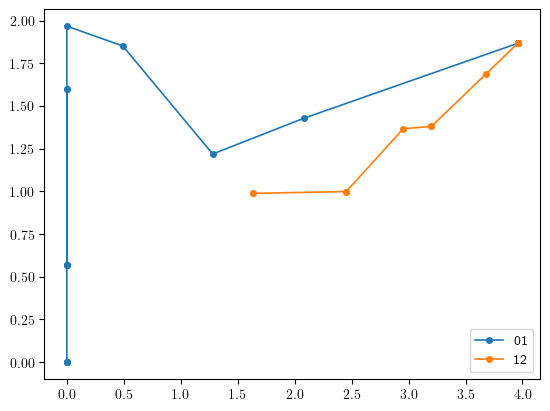

In [193]:
for k,r in enumerate(ren_types):
    plt.plot(results[k][:,1],results[k][:,2],"-o", linewidth = 1.2, markersize = 4)
#plt.plot(results[1][:,0],results[1][:,1],"-o", linewidth = 1.2,markersize = 4)
#plt.xlim([-0.2,3])
#plt.ylim([-0.2,3])
plt.legend(ren_types)

In [194]:
from sklearn.decomposition import PCA

model = PCA(n_components=2).fit(results[0])

X_reduced = [0 for i in range(len(ren_types))]
for k,r in enumerate(ren_types):
    X_reduced[k] = model.transform(results[k])


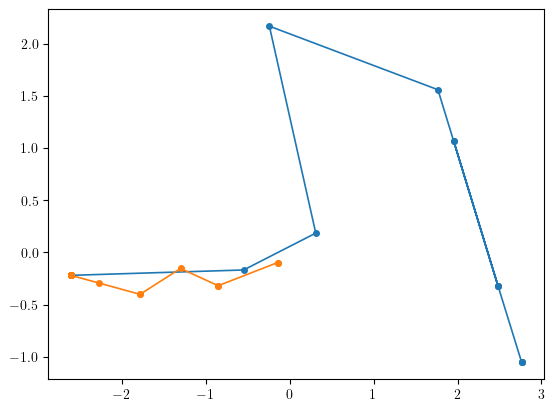

In [195]:
for k,r in enumerate(ren_types):
    plt.plot(X_reduced[k][:,0],X_reduced[k][:,1],"-o", linewidth = 1.2, markersize = 4)

#plt.plot(results[1][:,0],results[1][:,1],"-o", linewidth = 1.2,markersize = 4)
#plt.xlim([-0.2,3])
#plt.ylim([-0.2,3])